In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.api as sm
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
import joblib
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [2]:
df = pd.read_csv('dados_treino_statsmodel_2022_2023.csv', sep='|')
df.head()

,DT_ATENDIMENTO,ATENDIMENTOS
0,2022-01-01,6
1,2022-01-02,15
2,2022-01-03,13
3,2022-01-04,5
4,2022-01-05,7


In [3]:
df.set_index('DT_ATENDIMENTO', inplace=True)

model = sm.tsa.SimpleExpSmoothing(df['ATENDIMENTOS'])
ses_model = model.fit(smoothing_level=0.3)
df['Forecast'] = ses_model.fittedvalues

df.head()



# joblib.dump(logistic_regression, "dados_treino_2022.pkl")

/home/caue/.local/share/virtualenvs/datasaude-ml-3sD6oy_M/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/caue/.local/share/virtualenvs/datasaude-ml-3sD6oy_M/lib/python3.11/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


,ATENDIMENTOS,Forecast
DT_ATENDIMENTO,,
2022-01-01,6,6.000
2022-01-02,15,6.000
2022-01-03,13,8.700
2022-01-04,5,9.990
2022-01-05,7,8.493


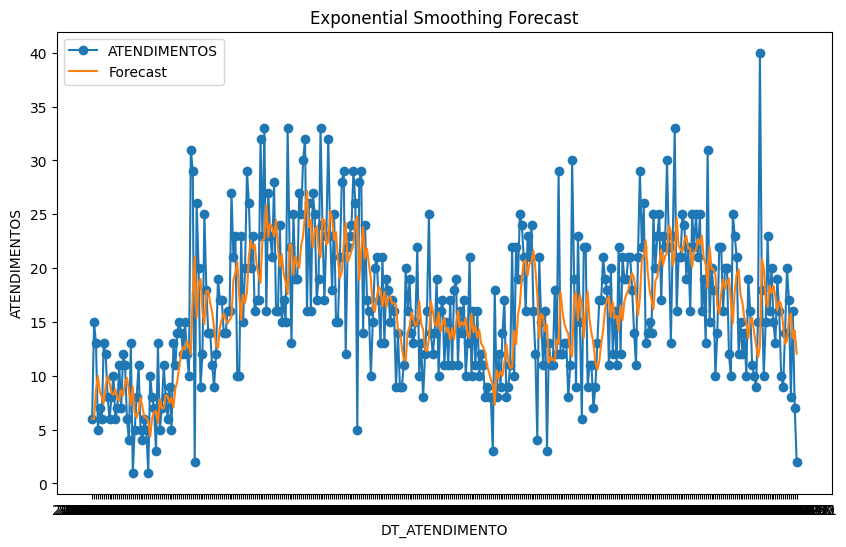

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(df['ATENDIMENTOS'], label='ATENDIMENTOS', marker='o')
plt.plot(df['Forecast'], label='Forecast')
plt.xlabel('DT_ATENDIMENTO')
plt.ylabel('ATENDIMENTOS')
plt.title('Exponential Smoothing Forecast')
plt.legend()
plt.show()

In [5]:
dias_futuros=30 
forecast = ses_model.forecast(steps=dias_futuros)
forecast_df = pd.DataFrame({
    'DT_ATENDIMENTO': forecast.index.strftime('%Y-%m-%d'),
    'ATENDIMENTOS': None,
    'Forecast': forecast.values
})
forecast_df.set_index('DT_ATENDIMENTO', inplace=True)
df_plot = pd.concat([df, forecast_df], ignore_index=False)
# df_plot.head()
df_plot.tail()



,ATENDIMENTOS,Forecast
DT_ATENDIMENTO,,
2023-01-26,None,9.03964
2023-01-27,None,9.03964
2023-01-28,None,9.03964
2023-01-29,None,9.03964
2023-01-30,None,9.03964


<Axes: xlabel='DT_ATENDIMENTO'>

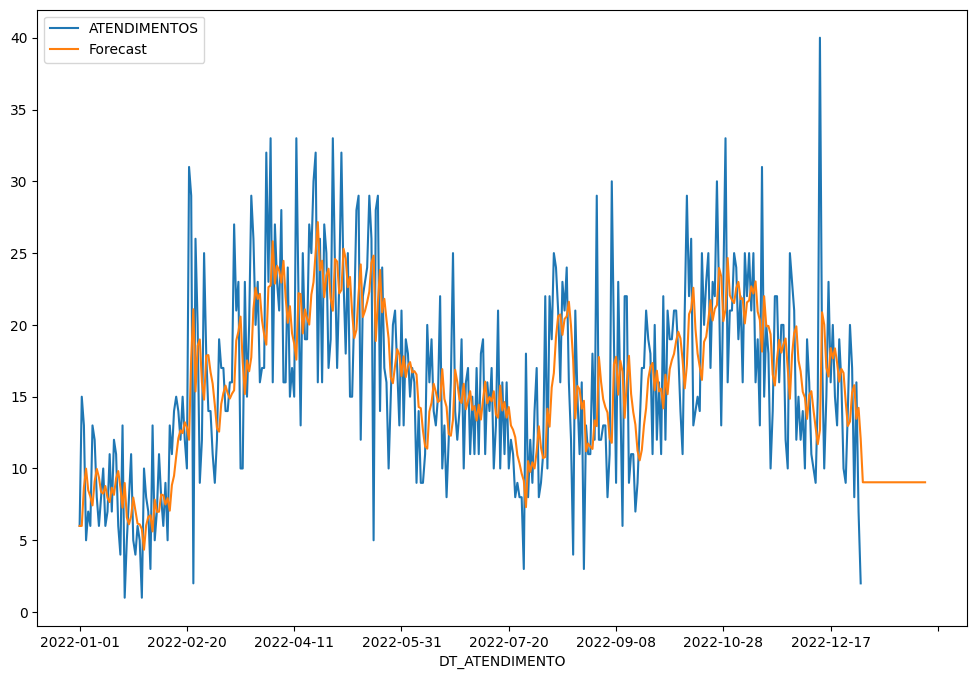

In [6]:
df_plot[['ATENDIMENTOS', 'Forecast']].plot(figsize=(12, 8))